<a href="https://colab.research.google.com/github/molly72/Project/blob/main/Linear%20Regression%20on%20BTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn. linear_model import LinearRegression
from sklearn.svm import SVR
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
sns.set()

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
btc_input_df=pd.read_csv('/content/drive/MyDrive/ML/btc_data.csv')

In [ ]:
btc_input_df

,time,low,high,open,close,volume
0,2023-01-01 00:01:00,16527.14,16532.69,16531.00,16529.38,5.961638
1,2023-01-01 00:02:00,16525.01,16531.04,16528.94,16527.07,23.837786
2,2023-01-01 00:03:00,16520.14,16527.07,16525.82,16522.65,15.802923
3,2023-01-01 00:04:00,16516.41,16524.33,16521.81,16523.48,18.666408
4,2023-01-01 00:05:00,16521.96,16524.50,16522.32,16524.50,10.900185
...,...,...,...,...,...,...
215660,2023-05-30 23:56:00,27692.11,27709.21,27693.55,27706.25,3.381525
215661,2023-05-30 23:57:00,27703.13,27709.20,27706.27,27705.96,1.663082
215662,2023-05-30 23:58:00,27701.20,27708.30,27708.28,27701.21,1.883806
215663,2023-05-30 23:59:00,27698.88,27706.12,27701.21,27700.15,1.465776


In [ ]:
btc_input_df.shape

(215665, 6)

In [ ]:
btc_input_df_datetype = btc_input_df.astype({'time': 'datetime64'})

In [ ]:
print('Null Values:',btc_input_df_datetype.isnull().values.sum())

Null Values: 0


In [ ]:
btc_input_df_datetype['date'] = pd.to_datetime(btc_input_df_datetype['time'],unit='s').dt.date

display(btc_input_df_datetype.head())

,time,low,high,open,close,volume,date
0,2023-01-01 00:01:00,16527.14,16532.69,16531.00,16529.38,5.961638,2023-01-01
1,2023-01-01 00:02:00,16525.01,16531.04,16528.94,16527.07,23.837786,2023-01-01
2,2023-01-01 00:03:00,16520.14,16527.07,16525.82,16522.65,15.802923,2023-01-01
3,2023-01-01 00:04:00,16516.41,16524.33,16521.81,16523.48,18.666408,2023-01-01
4,2023-01-01 00:05:00,16521.96,16524.50,16522.32,16524.50,10.900185,2023-01-01


In [ ]:
group = btc_input_df_datetype.groupby('date')

btc_closing_price_groupby_date = group['close'].mean()

In [ ]:
btc_closing_price_groupby_date.shape

(151,)

In [ ]:
prediction_days = 45

df_train= btc_closing_price_groupby_date[:106].values.reshape(-1,1)

df_test= btc_closing_price_groupby_date[106:136].values.reshape(-1,1)

df_validation= btc_closing_price_groupby_date[136:].values.reshape(-1,1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_validation = MinMaxScaler(feature_range=(0, 1))
scaled_validation = scaler_validation.fit_transform(df_validation)

scaler_train = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler_train.fit_transform(df_train)

scaler_test = MinMaxScaler(feature_range=(0, 1))
scaled_test = scaler_test.fit_transform(df_test)

In [ ]:
def dataset_generator_lstm(dataset, look_back=5):
    # A “lookback period” defines the window-size of how many
    # previous timesteps are used in order to predict
    # the subsequent timestep.
    dataX, dataY = [], []

    for i in range(len(dataset) - look_back):
        window_size_x = dataset[i:(i + look_back), 0]

        dataX.append(window_size_x)
        dataY.append(dataset[i + look_back, 0]) # this is the label or actual y-value
    return np.array(dataX), np.array(dataY)

trainX, trainY = dataset_generator_lstm(scaled_train)

testX, testY = dataset_generator_lstm(scaled_test)

validX, validY = dataset_generator_lstm(scaled_validation)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(trainX, trainY)

y_valid = model.predict(validX)
y_pred = model.predict(testX)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_squared_error(testY, y_pred, squared = False))
print("Coefficient of Determination:", r2_score(testY, y_pred))

Model Coefficients: [ 0.04657673 -0.14682603  0.14939567 -0.31958192  1.2465027 ]
Mean Absolute Error: 0.1332702491648944
Coefficient of Determination: 0.7389478506342728


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_squared_error(validY, y_valid, squared = False))
print("Coefficient of Determination:", r2_score(validY, y_valid))

Model Coefficients: [ 0.04657673 -0.14682603  0.14939567 -0.31958192  1.2465027 ]
Mean Absolute Error: 0.23336806212382644
Coefficient of Determination: 0.5296868924091076


# previous

In [ ]:
def lagit(df, lags):
    names = []
    for i in range(1,lags +1):
      df['Lag_'+str(i)] = df['returns'].shift(i)
      names.append('Lag_'+str(i))
    return names

In [ ]:
lagnames = lagit(df,2)

In [ ]:
df.dropna(inplace=True)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(df[lagnames], df['returns'])

LinearRegression()

In [ ]:
df['prediction_LR'] = model.predict(df[lagnames])

In [ ]:
df['direction_LR'] = [1 if i > 0 else -1 for i in df.prediction_LR]

In [ ]:
df['strat_LR'] = df['direction_LR'] * df['returns']

In [ ]:
np.exp(df[['returns','strat_LR']].sum())

returns     1.055822
strat_LR    1.145564
dtype: float64

<Axes: xlabel='Date'>

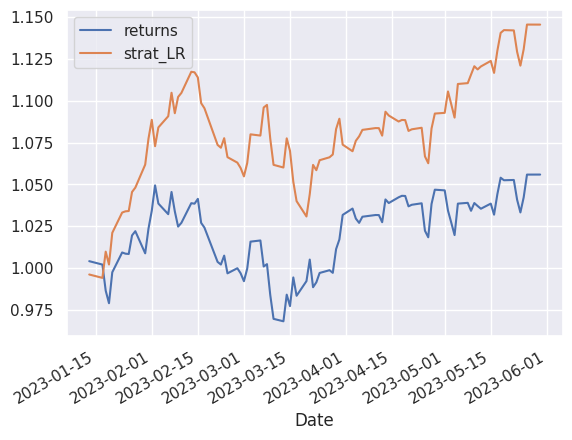

In [ ]:
np.exp(df[['returns','strat_LR']].cumsum()).plot()

In [ ]:
train,test = train_test_split(df, shuffle = False,
                              test_size=0.3, random_state = 0)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(train[lagnames], train['returns'])

LinearRegression()

In [ ]:
test['prediction_LR'] = model.predict(test[lagnames])

In [ ]:
test['direction_LR'] = [1 if i > 0 else -1 for i in test.prediction_LR]

In [ ]:
test['strat_LR'] = test['direction_LR'] * test['returns']

In [ ]:
np.exp(test[['returns','strat_LR']].sum())

returns     1.012190
strat_LR    1.049095
dtype: float64

In [ ]:
(test['direction_LR'].diff() != 0).value_counts()

False    21
True      8
Name: direction_LR, dtype: int64

<Axes: xlabel='Date'>

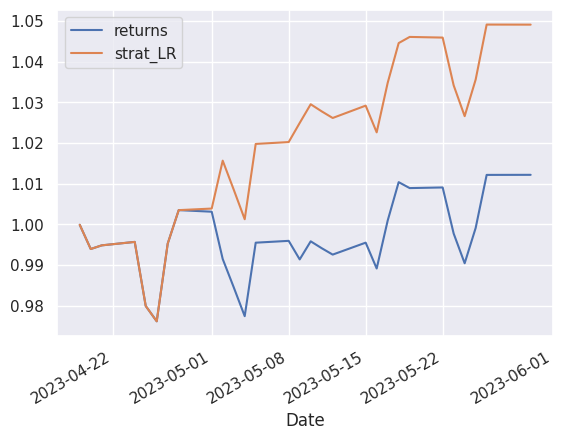

In [ ]:
np.exp(test[['returns','strat_LR']].cumsum()).plot()